# ACTIVITY 2 - DATA MINING (Wine Dataset)
# Author: Matheus Aparecido do Carmo Alves - 9791114

## 1. KNN Classifier Implementation

Hi! In this first section, we are going to implement a KNN Classifier using the Python Scikit and the Wine Dataset.

So, the first step is to import the python packages:

In [1]:
# Importing the packages
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils.multiclass import unique_labels

import pandas as pd

After import, we need to get the Wine dataset, following the code line bellow \[[2](#cell2)\].

The Wine dataset contains 13 attributes:
1. Alcohol (class identifier 1-3)
2. Malic acid
3. Ash
4. Alcalinity of ash  
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline   

<a id="cell2"></a>

In [2]:
# 1. Getting the Wine data 
wine = load_wine()

Now, we need to split the data set into a random train and test subsets as in \[[3](#cell3)\].

Note:

- Train set = 75% of available data; Test set = 25% of available data
- The sets are assembled randomly

<a id="cell3"></a>

In [3]:
# 2. Splitting the data set into random train and test subsets
train_set, test_set, train_class, test_class = \
	train_test_split(wine['data'],wine['target'],train_size=0.75,test_size=0.25)
print('Train set size:',len(train_set))
print('Test set size:',len(test_set),'\n')

('Train set size:', 133)
('Test set size:', 45, '\n')


After split, we will use the set of trains and train classes to build our KNN Classifier as in \[[4](#cell4)\].

<a id="cell4"></a>

In [4]:
# 3. Classification steps
# a. building the classification KNN space
knn_classifier = KNeighborsClassifier(n_neighbors=5,weights='distance')
knn_classifier.fit(train_set, train_class)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

And, with the trained KNN model, we will classify (predict) the classes of the test set in \[[5](#cell5)\].

<a id="cell5"></a>

In [5]:
# b. classifing the test set (predicting the test set classes)
predict_class = knn_classifier.predict(test_set)

This last step represents the classification step.

To show the results, we will build and plot a confusion matrix, following the steps:

1- Calculating the confusion matrix; 

<a id="cell6"></a>

In [6]:
# c. calculating the confusion matrix
result = confusion_matrix(test_class,predict_class)
print('Unnormalized Confusion Matrix')
print(result)

Unnormalized Confusion Matrix
[[13  0  1]
 [ 4 11  5]
 [ 0  5  6]]


2- Normalizing the resulting confusion matrix;

<a id="cell7"></a>

In [7]:
# d. normalizing the confusion matrix
result = result.astype('float') / result.sum(axis=1)[:, np.newaxis]
print('Normalized Confusion Matrix')
print(result)

Normalized Confusion Matrix
[[0.92857143 0.         0.07142857]
 [0.2        0.55       0.25      ]
 [0.         0.45454545 0.54545455]]


3- Getting the confusion matrix labels (classes);

<a id="cell8"></a>

In [8]:
# e. getting the confusion matrix labels
classes = wine.target_names[unique_labels(train_class, predict_class)]

4- Plotting by Matplotlib.

<a id="cell9"></a>

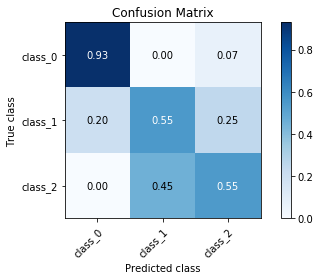

In [9]:
# 4. Plotting the results
# a. configuring the plot
fig, ax = plt.subplots()
im = ax.imshow(result, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(result.shape[1]),yticks=np.arange(result.shape[0]),\
    xticklabels=wine.target_names, yticklabels=wine.target_names,\
    title='Confusion Matrix', ylabel='True class', xlabel='Predicted class')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = '.2f'
thresh = result.max() / 2.
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        ax.text(j, i, format(result[i, j], fmt),\
            ha="center", va="center",\
            color="white" if result[i, j] > thresh else "black")
fig.tight_layout()

# b. plotting
plt.show()

## 2. Confusion Matrix Calculation 

In this section, we will show how to calculate the confusion matrix without the sklearn.metrics.confusion_matrix method.

Basically, the non-normalized confusion matrix can be calculated following the loop \[[10](#cell10)\].

<a id="cell10"></a>

In [10]:
confusion_matrix = np.zeros((3,3))
for i in range(0,3):
    for j in range(len(predict_class)):
        if(test_class[j] == i):
            confusion_matrix[i,predict_class[j]] += 1
print(confusion_matrix)

[[13.  0.  1.]
 [ 4. 11.  5.]
 [ 0.  5.  6.]]


As you can see, the result in this loop is the same that was presented in \[[6](#cell6)\].

Furthermore, we can normalize this matrix following the loop in \[[11](#cell11)\]

<a id="cell11"></a>

In [11]:
for i in range(0,3):
    norm = sum(confusion_matrix[i,]) 
    for j in range(0,3):
        confusion_matrix[i,j] = confusion_matrix[i,j]/norm
print(confusion_matrix)

[[0.92857143 0.         0.07142857]
 [0.2        0.55       0.25      ]
 [0.         0.45454545 0.54545455]]


As you can see, the result in this loop is the same that was presented in \[[7](#cell7)\].

Therefore, our proposal to calculate the confusion matrix is valid.

## 3. Why is the KNN Classifier Lazy?

### a. What is a Lazy Learn Process?

In machine learning, lazy learning is a learning method in which generalization of the training data is, in theory, delayed until a query is made to the system, as opposed to in eager learning, where the system tries to generalize the training data before receiving queries.

So we can say the lazy classifiers are those that do not have a "defined training phase" - it attempts to generalize the training data set based on the available parameters (i.e., "memorize" the training data set parameters) instead of to learn a discriminating function that approximates the parameters which define each class of the training data.

### b. The KNN Classifier

The KNN Classifier is denominated a lazy algorithm because it just creates a D-dimensional space (where D is the number of parameters studied in the "training dataset"), calculates the "distance" between the D-dimensional sets and the new data (in the "testing dataset") and the K nearest neighbours define the class of the current data.

In other words, note that it does not "learn" or "train" the model. It is only a clusterisation of the given initial dataset to evaluate the new data by the proximity between it and the clusters.
Therefore, a better evaluation (split) of the initial data set for the KNN Classifier results in a better classification (in our example).

The advantages associated with this are:
-  lazy learning methods approximate the target function locally (that is, the target function is approximated locally for each query to the system), so it is faster for scenarios with multiples queries;
- lazy learning systems can simultaneously solve multiple problems and deal successfully with changes in the problem domain;
- deal with a continually changing scenario (adding or removing data).

